In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Examining the Data

In [11]:
# Loads and displays the first 5 rows of the integrated dataset
df = pd.read_csv("../data/processed/integrated.csv")
df.head()

,year,precipitation,count,fatalities,injuries,majinjury,mininjury,possinjury,unkinjury,propdmg
0,2014,4.35,3017,19,1191,88,379,682,42,19511105
1,2015,4.18,3986,23,1606,71,460,966,109,26318128
2,2016,6.12,2679,7,1013,46,277,611,79,17648125
3,2017,2.31,3047,9,1190,69,327,692,102,20706389
4,2018,8.10,3389,12,1260,51,357,743,109,22543154


In [12]:
# Checks for missing values
df.isna().sum()

year             0
precipitation    0
count            0
fatalities       0
injuries         0
majinjury        0
mininjury        0
possinjury       0
unkinjury        0
propdmg          0
dtype: int64

In [13]:
# Verifies correct data types
df.dtypes

year               int64
precipitation    float64
count              int64
fatalities         int64
injuries           int64
majinjury          int64
mininjury          int64
possinjury         int64
unkinjury          int64
propdmg            int64
dtype: object

In [14]:
# Examines data statistics
df.describe()

,year,precipitation,count,fatalities,injuries,majinjury,mininjury,possinjury,unkinjury,propdmg
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,2019.000000,3.807273,2698.000000,13.545455,1047.727273,55.181818,308.272727,596.090909,88.181818,1.985579e+07
std,3.316625,2.289489,704.934039,5.007267,292.885674,17.514669,80.801103,194.388505,20.336264,3.273525e+06
min,2014.000000,0.690000,1437.000000,7.000000,522.000000,29.000000,157.000000,272.000000,42.000000,1.360205e+07
25%,2016.500000,2.020000,2317.500000,10.000000,879.500000,43.500000,270.000000,470.500000,80.500000,1.797823e+07
50%,2019.000000,4.070000,2679.000000,12.000000,1013.000000,51.000000,299.000000,611.000000,95.000000,1.996591e+07
75%,2021.500000,5.235000,3070.000000,17.500000,1217.500000,67.500000,356.000000,710.000000,100.000000,2.127322e+07
max,2024.000000,8.100000,3986.000000,23.000000,1606.000000,88.000000,460.000000,966.000000,109.000000,2.631813e+07


In [15]:
# Examines variable correlations
corr = df.corr()
corr

,year,precipitation,count,fatalities,injuries,majinjury,mininjury,possinjury,unkinjury,propdmg
year,1.000000,-0.581428,-0.821086,-0.427525,-0.808222,-0.762615,-0.766828,-0.835254,0.047444,-0.546172
precipitation,-0.581428,1.000000,0.634567,0.241331,0.571552,0.286600,0.489709,0.609446,0.213480,0.424792
count,-0.821086,0.634567,1.000000,0.570968,0.992888,0.715334,0.951649,0.991708,0.423034,0.905953
fatalities,-0.427525,0.241331,0.570968,1.000000,0.603702,0.627030,0.654575,0.574760,0.059815,0.594290
injuries,-0.808222,0.571552,0.992888,0.603702,1.000000,0.735634,0.970531,0.994062,0.410455,0.922063
majinjury,-0.762615,0.286600,0.715334,0.627030,0.735634,1.000000,0.773701,0.704619,-0.075906,0.609599
mininjury,-0.766828,0.489709,0.951649,0.654575,0.970531,0.773701,1.000000,0.945315,0.302123,0.927888
possinjury,-0.835254,0.609446,0.991708,0.574760,0.994062,0.704619,0.945315,1.000000,0.395074,0.884755
unkinjury,0.047444,0.213480,0.423034,0.059815,0.410455,-0.075906,0.302123,0.395074,1.000000,0.610805
propdmg,-0.546172,0.424792,0.905953,0.594290,0.922063,0.609599,0.927888,0.884755,0.610805,1.000000


## Creating a Correlation Heatmap Visualization

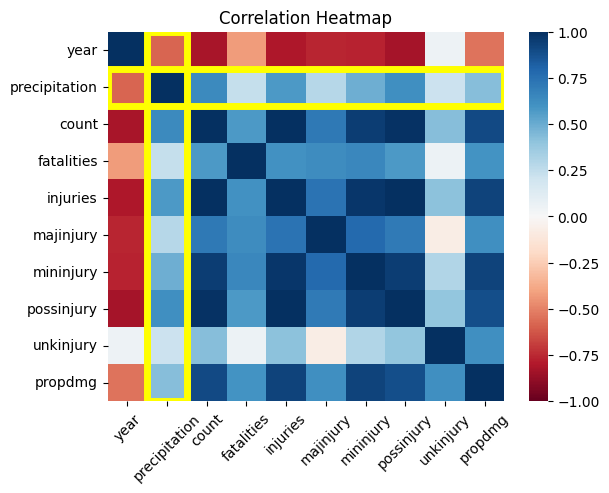

In [16]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, cmap='RdBu')
rect1 = patches.Rectangle((1, 0), width=1, height=corr.shape[0], fill=False, edgecolor="yellow", linewidth=5)
rect2 = patches.Rectangle((0, 1), width=corr.shape[1], height=1, fill=False, edgecolor="yellow", linewidth=5)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.xticks(rotation=45)


plt.title("Correlation Heatmap")
plt.savefig("../results/heatmap.png", bbox_inches='tight')

## Creating a Precipitation Pairplot Visualization

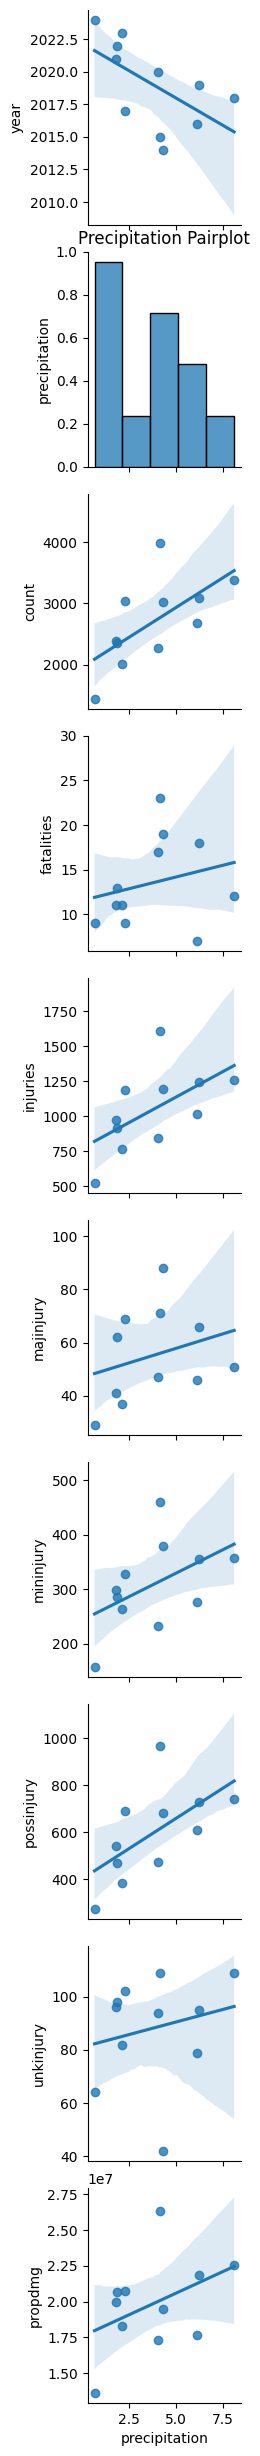

In [17]:
sns.pairplot(x_vars=["precipitation"], y_vars=df.columns, data=df, kind='reg')
plt.title("Precipitation Pairplot")
plt.savefig("../results/pairplot.png", bbox_inches='tight')

## Creating a Precipitatin vs Count Scatterplot with Line of Best Fit

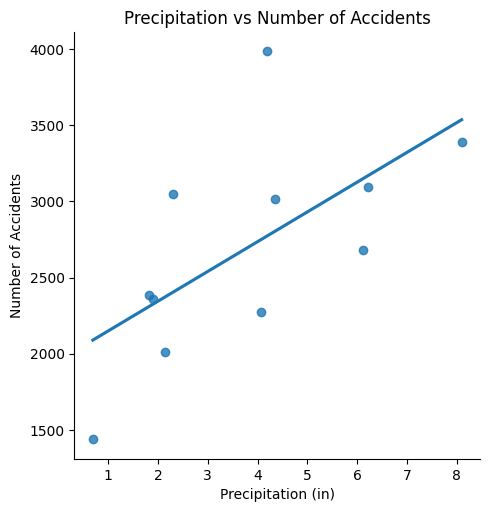

In [18]:
sns.lmplot(x='precipitation',y='count',data=df, ci=False)
plt.xlabel("Precipitation (in)")
plt.ylabel("Number of Accidents")
plt.title("Precipitation vs Number of Accidents")
plt.savefig("../results/lmplot.png", bbox_inches='tight')

## Creating a Lineplot for Precipitation and Count on Twin Axes

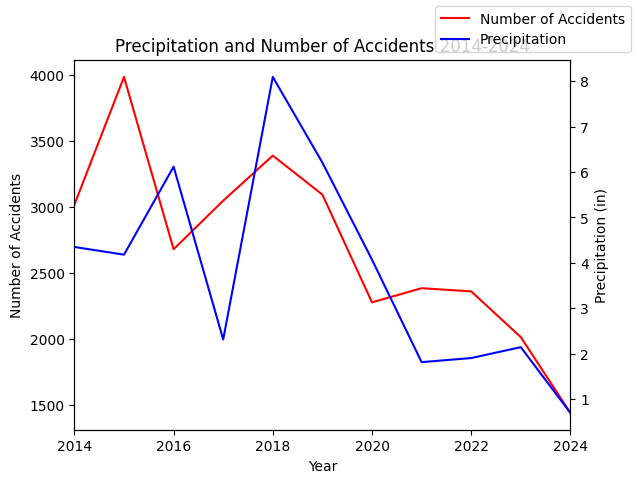

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(df['year'], df['count'], label="Number of Accidents", color='red')
ax1.set_xlabel("Year")
plt.xlim(2014, 2024)
ax1.set_ylabel("Number of Accidents")
ax1.set_title("Precipitation and Number of Accidents 2014-2024")
# ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df['year'], df['precipitation'], label="Precipitation", color='blue')
ax2.set_ylabel("Precipitation (in)")
ax2.grid(False)
fig.legend()

fig.savefig("../results/lineplot.png", bbox_inches='tight')

## Using Pycaret to Find the Best Linear Regression Model

In [20]:
from pycaret import regression

regression.setup(data=df[["precipitation", "count"]], target='count', session_id=123, fold_strategy='kfold', fold=3)
best_model = regression.compare_models(include=['lr', 'ridge', 'lasso', 'en', 'huber'])

,Description,Value
0,Session id,123
1,Target,count
2,Target type,Regression
3,Original data shape,"(11, 2)"
4,Transformed data shape,"(11, 2)"
5,Transformed train set shape,"(7, 2)"
6,Transformed test set shape,"(4, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,682.5620,654101.7413,777.5708,-0.4852,0.2923,0.2683,0.3500
ridge,Ridge Regression,695.1843,680654.9693,796.4304,-0.5765,0.2887,0.2660,0.3367
lasso,Lasso Regression,707.9970,728761.6294,826.0721,-0.7237,0.2881,0.2636,0.3333
lr,Linear Regression,708.2047,729636.7283,826.5871,-0.7265,0.2881,0.2635,0.8667
huber,Huber Regressor,824.3108,997278.5739,988.4547,-1.7009,0.3473,0.3004,0.3333


In [21]:
# Slope for count
best_model.coef_

array([200.10318], dtype=float32)

In [22]:
# Intercept
best_model.intercept_

1930.2559

$\widehat{count}$ $=$ $200.10318$ $*$ $precipitation$ $+$ $1930.2559$